In [1]:
import pyam
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.transforms as mtransforms

import numpy as np

In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

In [3]:
df_sr15 = pyam.IamDataFrame('data/01_sr15_data.xlsx')
df_ar6 = pyam.IamDataFrame('data/01_ar6_data.xlsx')
ngfs = pyam.IamDataFrame('data/01_ngfs_data.xlsx')
debt = pyam.IamDataFrame('data/02_data.xlsx')

[INFO] 20:44:55 - pyam.core: Reading file data/01_sr15_data.xlsx
[INFO] 20:44:55 - pyam.core: Reading file data/01_ar6_data.xlsx
[INFO] 20:44:55 - pyam.core: Reading file data/01_ngfs_data.xlsx
[INFO] 20:44:55 - pyam.core: Reading file data/02_data.xlsx


In [4]:
def plot_range_max_eoc(df, qs, axs, loc, color):
    # First pull out max values
    m = df.timeseries().max(1)
    median = np.median(m)
    axs.fill_between(
        x=[loc-0.04, loc+0.04],
        y1=m.quantile(q=qs[0]),
        y2=m.quantile(q=qs[1]),
        color=color,
        alpha=0.6
    )
    axs.scatter(
        x=loc,
        y=median,
        color=color,
        marker='_',
        s=500
    )

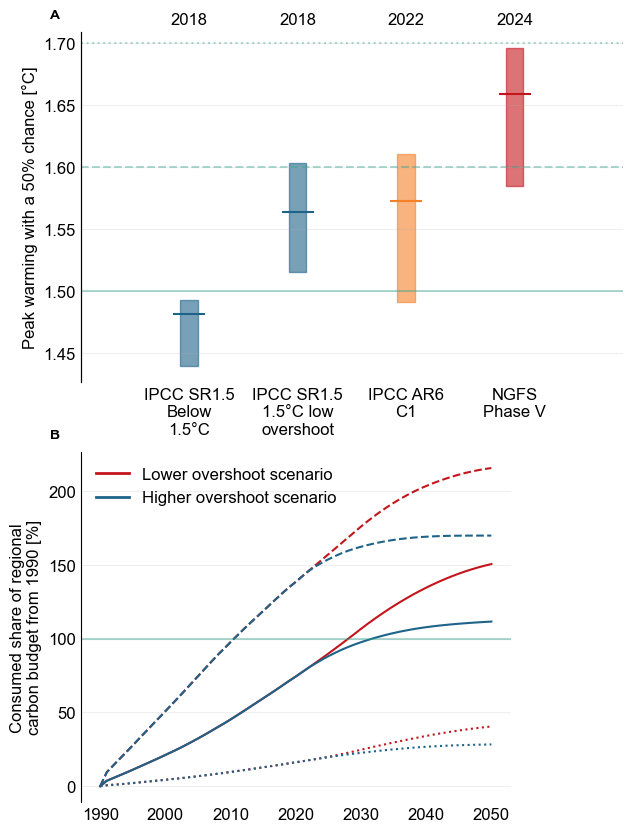

In [5]:
fig, ax = plt.subplot_mosaic(
    [
        ['a', 'a', 'a', 'a', 'a'],
        ['b', 'b', 'b', 'b', 'c']
    ],
    figsize=(7,10),
)

# Panel a: Plot the range of peak warming outcomes
plot_range_max_eoc(df_sr15.filter(category='Below 1.5C'), [0.05,0.95], ax['a'], 0, '#1E638A')
plot_range_max_eoc(df_sr15.filter(category='1.5C low overshoot'), [0.05,0.95], ax['a'], 0.5, '#1E638A')
plot_range_max_eoc(df_ar6.filter(Category='C1'), [0.05,0.95], ax['a'], 1, '#F48128')
plot_range_max_eoc(ngfs, [0.05,0.95], ax['a'], 1.5, '#C3161C')
ax2 = ax['a'].twiny()
ax['a'].set_xlim([-0.5, 2])
ax2.set_xlim([-0.5, 2])
ax2.set_xticks([0, 0.5, 1, 1.5])
ax2.set_xticklabels(
    [2018, 2018, 2022, 2024],
    #weight='bold'
)
ax['a'].set_xticks([0, 0.5, 1, 1.5])
ax['a'].set_xticklabels(
    ['IPCC SR1.5\nBelow\n1.5°C', 'IPCC SR1.5\n1.5°C low\novershoot', 'IPCC AR6\nC1', 'NGFS\nPhase V']
)

#ax['a'].xaxis.tick_top()
ax['a'].spines[['top', 'bottom', 'right']].set_visible(False)
ax2.spines[['top', 'bottom', 'right']].set_visible(False)
ax['a'].grid(axis='y', alpha=0.2)
ax['a'].axhline(1.5, color='#31A18A', alpha=0.4)
ax['a'].axhline(1.6, color='#31A18A', alpha=0.4, linestyle='dashed')
ax['a'].axhline(1.7, color='#31A18A', alpha=0.4, linestyle='dotted')
ax2.tick_params(axis='both', which='both', length=0)
ax['a'].tick_params(axis='both', which='both', length=0)
ax['a'].set_ylabel('Peak warming with a 50% chance [°C]')

#ax['a'].plot(1, 3.5, ">k", transform=ax['a'].get_yaxis_transform(), clip_on=False)

## Panel B ###
scen_color_map = {
    'E':'#C3161C',
    'IMP-REN':'#1E638A',
}
for scen in scen_color_map.keys():
    debt.filter(
        scenario=scen,
        region='World',
        year=range(1990, 2051)
    ).plot(color=scen_color_map[scen], ax=ax['b'])
    debt.filter(
        scenario=scen,
        region='R10AFRICA',
        year=range(1990, 2051)
    ).plot(color=scen_color_map[scen], ax=ax['b'], linestyle='dotted')
    debt.filter(
        scenario=scen,
        region='R10EUROPE',
        year=range(1990, 2051)
    ).plot(color=scen_color_map[scen], ax=ax['b'], linestyle='dashed')

ax['b'].spines[['top', 'right', 'bottom']].set_visible(False)
ax['b'].axhline(100, color='#31A18A', alpha=0.4)
ax['b'].set_title('')
ax['b'].set_xlabel('')
ax['b'].grid(axis='y', alpha=0.2)
ax['b'].tick_params(axis='both', which='both', length=0)

custom_legend = [
    Line2D([0], [0], color='#C3161C', lw=2, label='Lower overshoot scenario'),
    Line2D([0], [0], color='#1E638A', lw=2, label='Higher overshoot scenario')
]
ax['b'].legend(handles=custom_legend, framealpha=0)
ax['b'].set_ylabel('Consumed share of regional\ncarbon budget from 1990 [%]')
ax['c'].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax['c'].set_xticks([])
ax['c'].set_yticks([])

## Subplot labels ##
for label, a in ax.items():
    if label=='c':
        continue
    trans = mtransforms.ScaledTranslation(-22/72, 10/72, fig.dpi_scale_trans)
    a.text(0.0, 1.0, label.upper(), transform=a.transAxes + trans, weight='bold', fontsize=10)

In [6]:
fig.savefig('figure1.svg', dpi=300, bbox_inches='tight')
fig.savefig('figure1.png', dpi=300, bbox_inches='tight')